<a href="https://colab.research.google.com/github/Cooper2112/SQC/blob/main/SQCHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/Colab Notebooks/SQCHW3.csv', sep=',')

data2

,Run,I,II,Run Totals,Contrasts,SS,MS,F,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,221,311.0,532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a,325,435.0,760.0,146.0,1332.25,1332.25,0.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b,354,348.0,702.0,674.0,28392.25,28392.25,9.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c,552,472.0,1024.0,574.0,20592.25,20592.25,6.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ab,440,453.0,893.0,-90.0,506.25,506.25,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ac,406,377.0,783.0,-954.0,56882.25,56882.25,19.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bc,605,500.0,1105.0,-194.0,2352.25,2352.25,0.796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,abc,392,419.0,811.0,-278.0,4830.25,4830.25,1.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Error,8,NaN,NaN,NaN,23636.25,29454.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [62]:
df=data2 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Run          9 non-null      object 
 1   I            9 non-null      int64  
 2   II           8 non-null      float64
 3   Run Totals   8 non-null      float64
 4   Contrasts    7 non-null      float64
 5   SS           8 non-null      float64
 6   MS           8 non-null      float64
 7   F            7 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(15), int64(1), object(1)
memory usage: 1.3+ KB


In [63]:
model = ols('I ~ II', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,11778.311678,1.0,2.565434,0.160342
II,77935.924437,1.0,16.975220,0.006216
Residual,27546.950563,6.0,NaN,NaN


In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     16.98
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00622
Time:                        00:20:04   Log-Likelihood:                -43.928
No. Observations:                   8   AIC:                             91.86
Df Residuals:                       6   BIC:                             92.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.4942    166.382     -1.602      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [66]:
se= model.mse_resid/(2*(2**3))
se

286.9474016967632

##13.6


In [67]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/Colab Notebooks/SQCHW3(13.6).csv', sep=',')

data2

,Treatment \nCombination,I,II
0,-1,188,195
1,a,172,180
2,b,179,187
3,ab,185,178
4,c,175,180
5,ac,183,178
6,bc,190,180
7,abc,175,168
8,d,200,193
9,ad,170,178


In [68]:
model = ols('I ~ II', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,54.572074,1.0,0.922248,0.353179
II,391.329447,1.0,6.613322,0.022167
Residual,828.420553,14.0,NaN,NaN


In [69]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.613
Date:                Mon, 03 Oct 2022   Prob (F-statistic):             0.0222
Time:                        00:53:25   Log-Likelihood:                -54.278
No. Observations:                  16   AIC:                             112.6
Df Residuals:                      14   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9522     52.015      0.960      0.3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [72]:
se= model.mse_resid/(2*(2**4))
se

1.8491530211964087

In [73]:
import pandas as pd

#create dataset
df = pd.DataFrame({'I': [188,172,179,185,175,183,190,175,200,170,189,183,201,181,189,178],
                   'II': [195,180,187,178,180,178,180,168,193,178,181,188,188,173,182,182]})

df[0:6]

,I,II
0,188,195
1,172,180
2,179,187
3,185,178
4,175,180
5,183,178


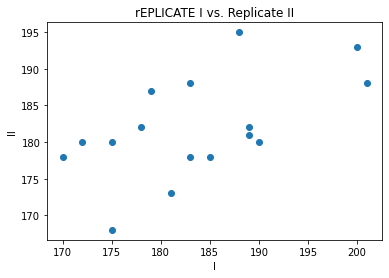

In [75]:
import matplotlib.pyplot as plt

plt.scatter(df.I, df.II)
plt.title('rEPLICATE I vs. Replicate II')
plt.xlabel('I')
plt.ylabel('II')
plt.show()

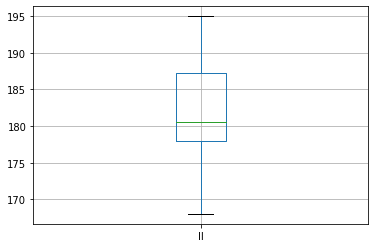

In [76]:
df.boxplot(column=['II'])

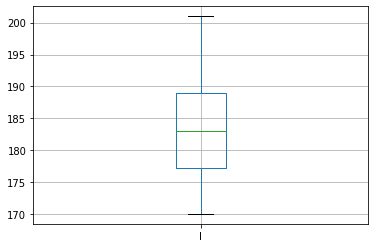

In [77]:
df.boxplot(column=['I'])

In [78]:
import statsmodels.api as sm

#define response variable
y = df['II']

#define explanatory variable
x = df[['I']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     II   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.613
Date:                Mon, 03 Oct 2022   Prob (F-statistic):             0.0222
Time:                        01:00:34   Log-Likelihood:                -50.116
No. Observations:                  16   AIC:                             104.2
Df Residuals:                      14   BIC:                             105.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7545     31.215      3.260      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


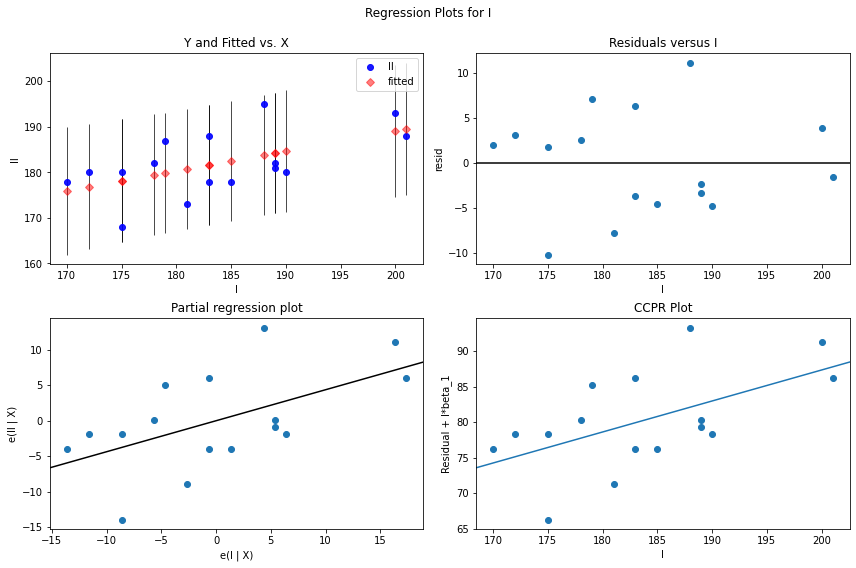

In [79]:
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'I', fig=fig)

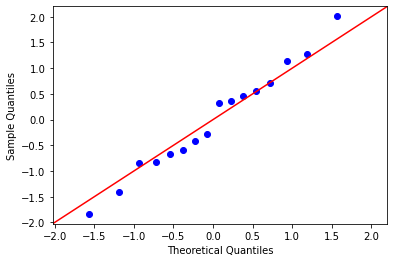

In [81]:
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 